In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import statsmodels.api as sm
#import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import sys
import statsmodels.formula.api as smf
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(os.getenv('PUIDATA'))

/home/cusp/ttd255/PUIdata


In [3]:
if not os.path.isfile(os.getenv("PUIDATA") + "/" + "rows.csv"):
    if not os.path.isfile("rows.csv"):
        !curl -O 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv'
    else:
        if os.system('mv rows.csv ' + os.getenv('PUIDATA')):
            print ("Error moving file!, Please check!")
if not os.path.isfile(os.getenv("PUIDATA") + "/" + "rows.csv"):    
    print('The file is not there. Something is wrong')

In [4]:
if not os.path.isfile(os.getenv("PUIDATA") + '/Manhattan/' + 'MNMapPLUTO.shp'):
    if not os.path.isfile(os.getenv("PUIDATA") + '/' + 'mn_mappluto_16v1.zip'):
        if not os.path.isfile('mn_mappluto_16v1.zip'):
            !curl -O 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip'
        os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))
    zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + 'mn_mappluto_16v1.zip')
    zf.extractall(os.getenv('PUIDATA') + '/' + 'Manhattan')
    zf.close
if not os.path.isfile(os.getenv("PUIDATA") + '/Manhattan/' + 'MNMapPLUTO.shp'):
    print('The file is not there. Something is wrong')

In [5]:
nrg = pd.read_csv(os.getenv("PUIDATA") + "/" + "rows.csv")
nrg.columns

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [6]:
nrg = nrg[['NYC Borough, Block, and Lot (BBL)','Zip Code',\
           'DOF Property Floor Area (Buildngs and Parking)(ft2)','DOF Number of Buildings',\
           'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)',\
           'Weather Normalized Site EUI(kBtu/ft2)', 'Total GHG Emissions(MtCO2e)']]

In [7]:
nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)':'BBL',\
                      'DOF Property Floor Area (Buildngs and Parking)(ft2)':'DOF Property Floor Area'}, inplace=True)

In [8]:
nrg.head()

,BBL,Zip Code,DOF Property Floor Area,DOF Number of Buildings,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Weather Normalized Site EUI(kBtu/ft2),Total GHG Emissions(MtCO2e)
0,1.000410e+09,NaN,NaN,NaN,NaN,918919,Not Available,NaN
1,4.021460e+09,11375.0,82730.0,1.0,NaN,NaN,NaN,NaN
2,2.027620e+09,NaN,NaN,NaN,NaN,64200,Not Available,NaN
3,1.006700e+09,10001.0,440360.0,1.0,NaN,NaN,NaN,NaN
4,2.048300e+09,NaN,NaN,NaN,NaN,50000,Not Available,NaN


### Figure 1: scatter matrix of all numerical values in the Energy Consumption file.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffe832bb320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffe835702e8>]], dtype=object)

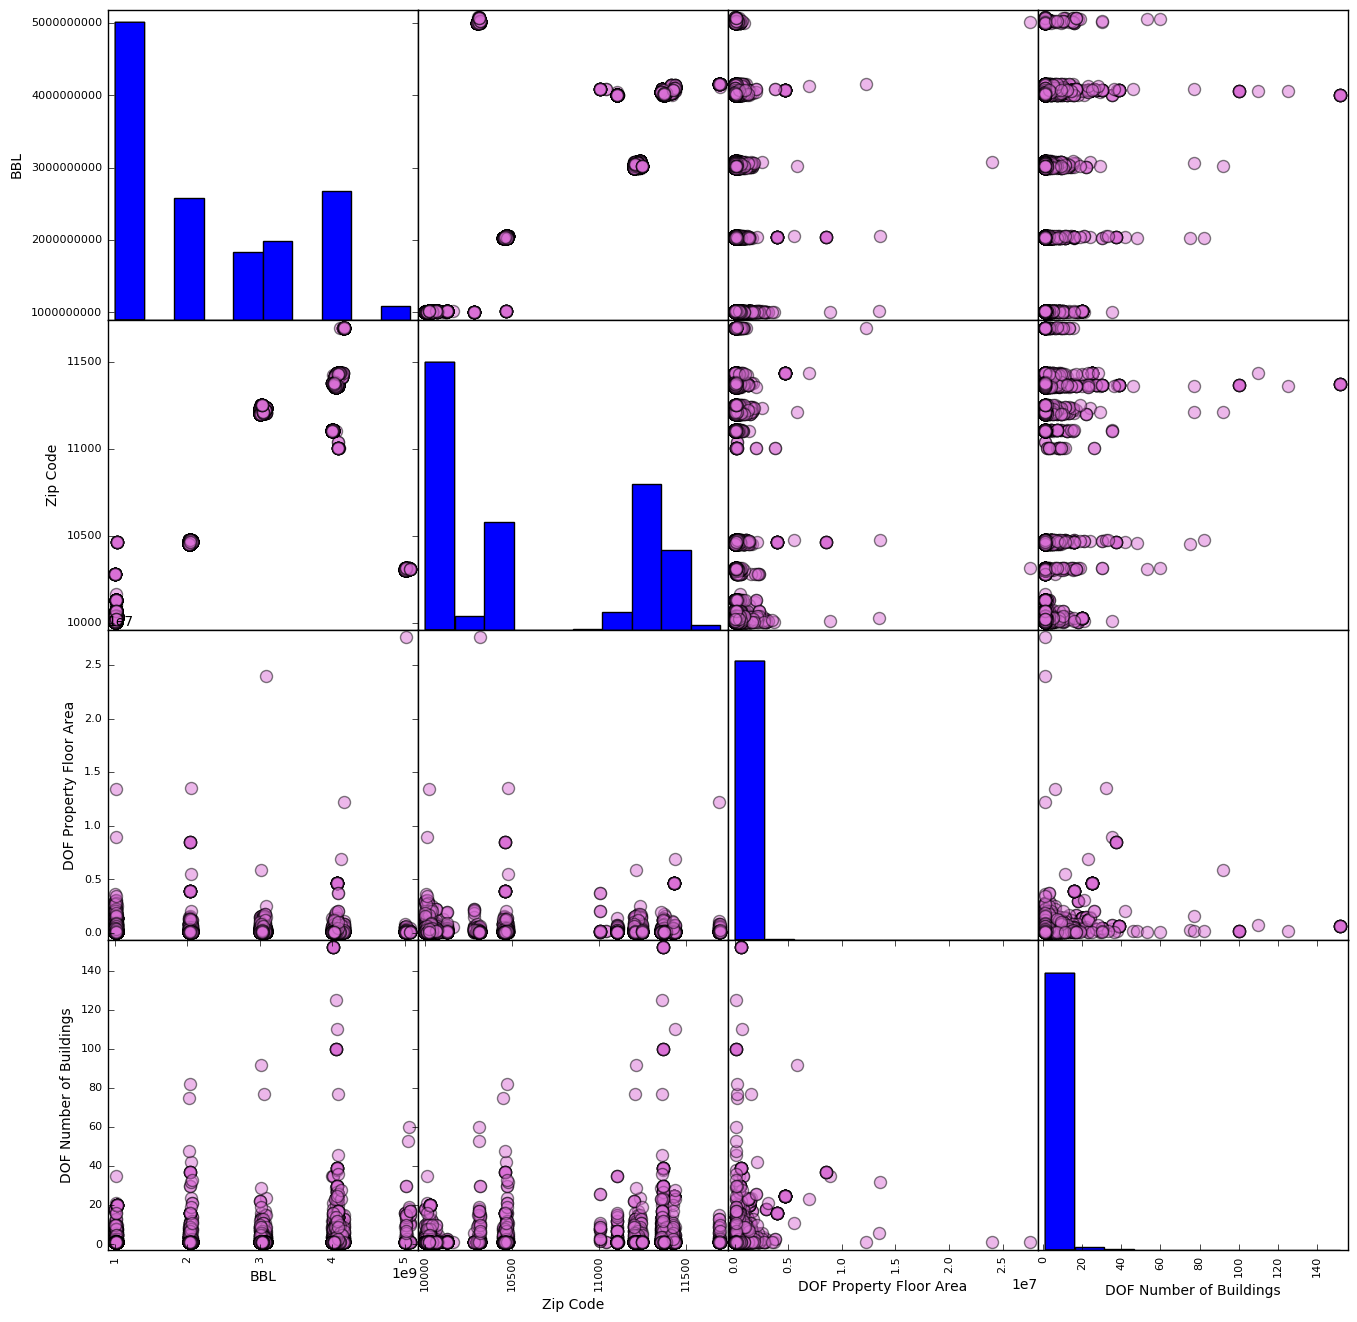

In [9]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), c = 'orchid')

In [10]:
bsize = gp.read_file(os.getenv("PUIDATA") + '/Manhattan/' + 'MNMapPLUTO.shp')
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

In [11]:
bsize = bsize[['BBL', 'UnitsRes', 'UnitsTotal', 'YearBuilt']]

In [12]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [13]:
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')

In [15]:
indx = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx] = float('NaN')

invalid entries changed to NaN 15430


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [16]:
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = \
                                pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')

In [17]:
bblnrgdata = pd.merge(bsize,nrg, on = 'BBL')
bblnrgdata.head(5)

,BBL,UnitsRes,UnitsTotal,YearBuilt,Zip Code,DOF Property Floor Area,DOF Number of Buildings,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),Weather Normalized Site EUI(kBtu/ft2),Total GHG Emissions(MtCO2e)
0,1.007238e+09,50,50,1914,10001.0,97563.0,1.0,68.7,95844.0,68.1,439.4
1,1.013850e+09,29,32,1928,10021.0,203490.0,1.0,87.4,206989.0,86.9,1562.5
2,1.021740e+09,72,72,1923,10040.0,52920.0,1.0,140.4,52920.0,Not Available,555.9
3,1.008830e+09,107,108,1931,10016.0,98359.0,1.0,96.5,98359.0,96.5,723.8
4,1.008570e+09,134,138,1910,10016.0,140000.0,1.0,36.4,154000.0,36.4,456.2


### Figure 2: scatter matrix of all numerical values in the merged file.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffe7f9f5550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffe7fa8b550>]], dtype=object)

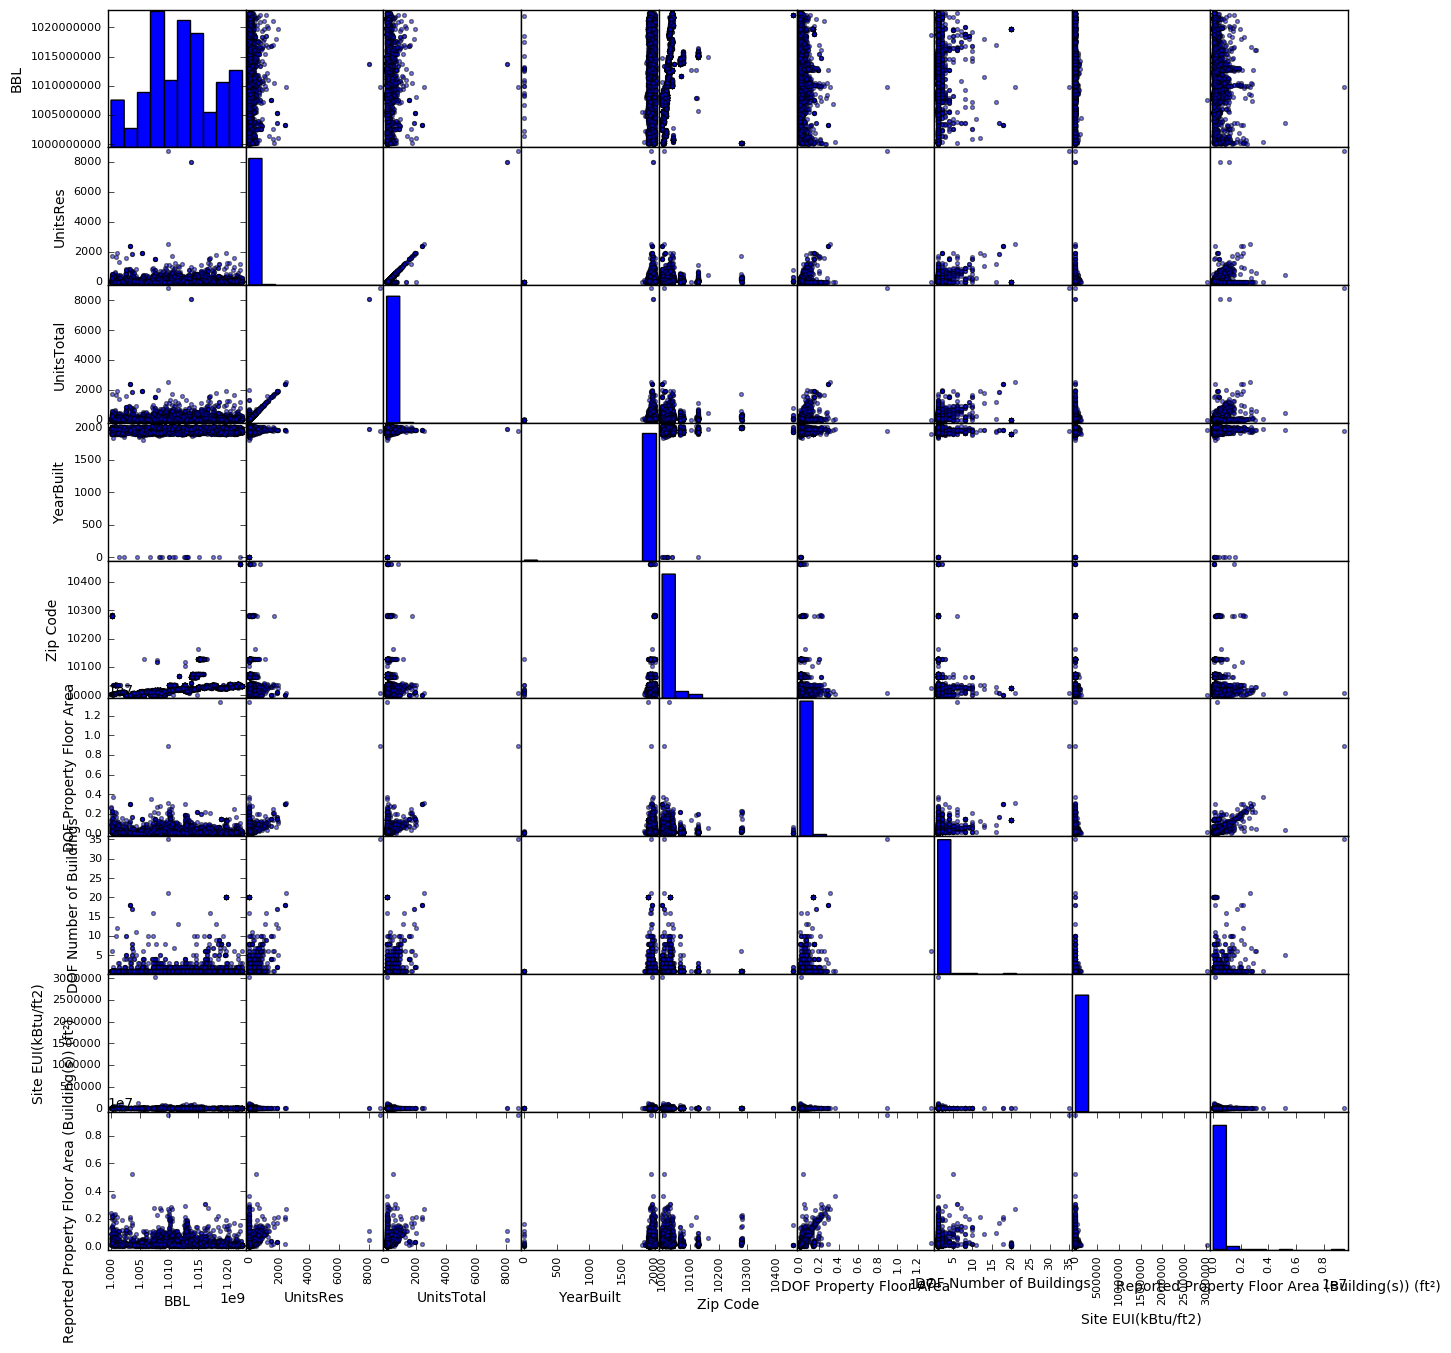

In [18]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

In [19]:
#Caulculate Total Energy Consumption
bblnrgdata['Energy'] = bblnrgdata['Site EUI(kBtu/ft2)'] \
                                           * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']

### Figure 3: Scatter Plot of Total Energy Consumption versus Number of Residential Buildings for all values

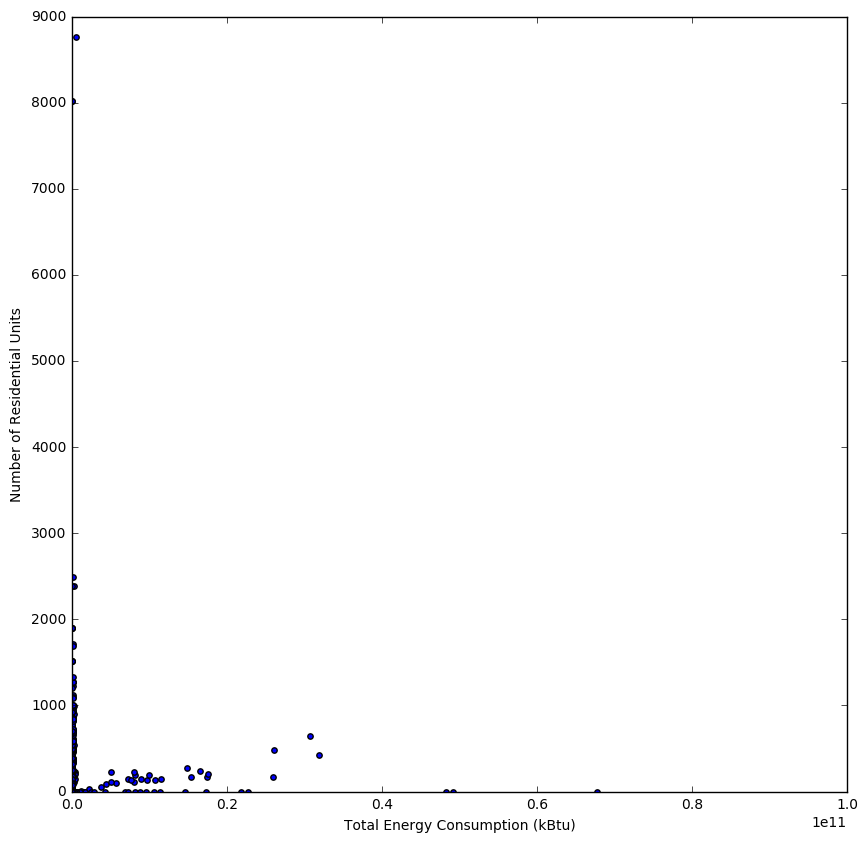

In [20]:
pl.figure(figsize=(10, 10))
pl.scatter(bblnrgdata['Energy'],bblnrgdata['UnitsRes'], s=15)
pl.xlim(0,1e11)
pl.ylim(0,9000)
pl.xlabel('Total Energy Consumption (kBtu)')
pl.ylabel('Number of Residential Units')

### Figure 4: Zoom-in Scatter Plot of Total Energy Consumption versus Number of Residential Buildings

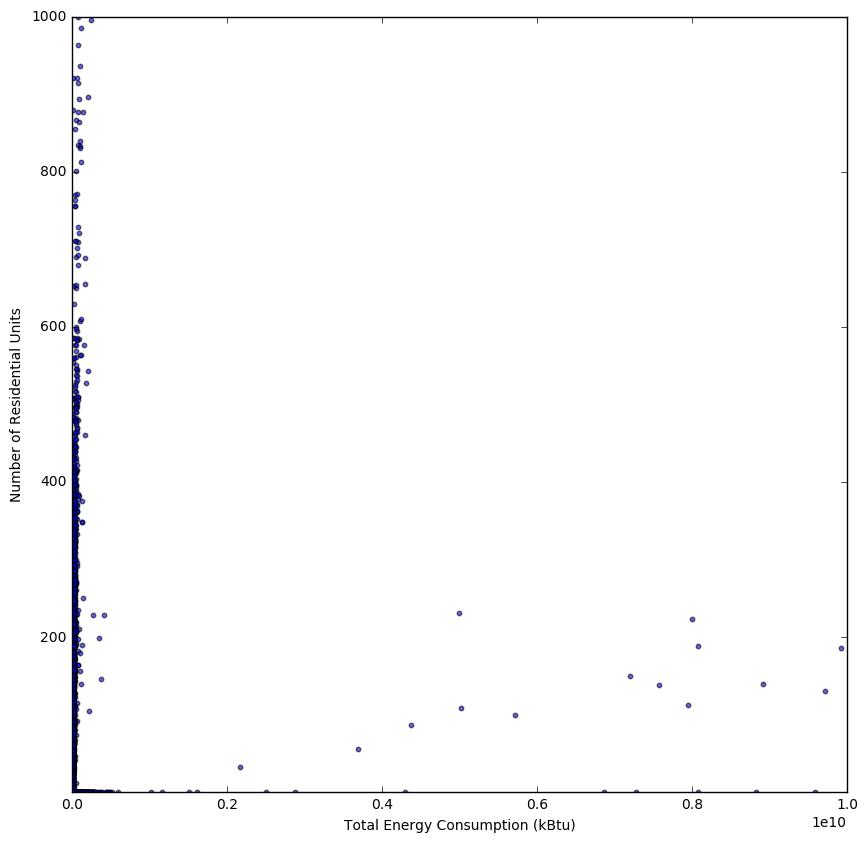

In [21]:
pl.figure(figsize=(10, 10))
pl.scatter(bblnrgdata['Energy'],bblnrgdata['UnitsRes'], s=10, alpha = 0.6)
pl.xlim(1000,1e10)
pl.ylim(1,1000)
pl.xlabel('Total Energy Consumption (kBtu)')
pl.ylabel('Number of Residential Units')

In [22]:
bblnrgdata_cut = bblnrgdata[(bblnrgdata['UnitsRes'] < 1000) & (bblnrgdata['UnitsRes'] > 0) & \
                            (bblnrgdata['Energy'] > 0)]

In [23]:
bblnrgdata_cut = bblnrgdata_cut[['UnitsRes','Energy']]

### Figure 5: Scatter plot of Logarithm values of Total Energy Consumption and Number of Residential Buildings

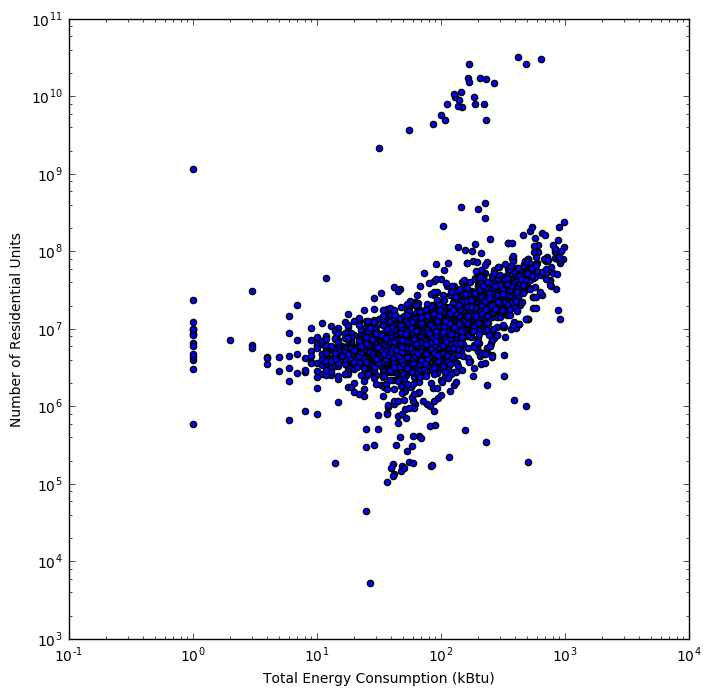

In [24]:
bblnrgdata_cut.plot('UnitsRes','Energy', kind = 'scatter', loglog=True, figsize = (8,8))
pl.xlabel('Total Energy Consumption (kBtu)')
pl.ylabel('Number of Residential Units')

### Figure 6: Scatter plot of Logarithm values of Number of Residential Buildings and Total Energy Consumption

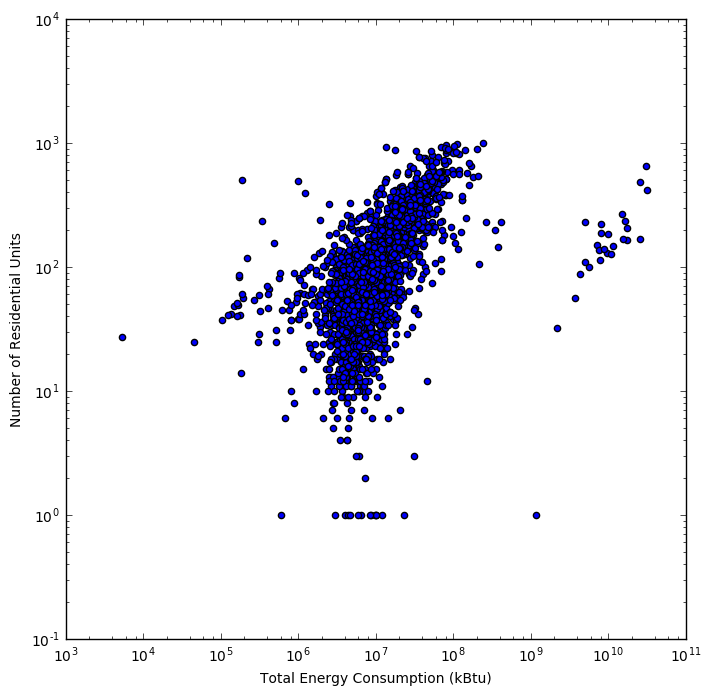

In [25]:
bblnrgdata_cut.plot('Energy','UnitsRes', kind = 'scatter', loglog=True, figsize = (8,8))
pl.xlabel('Total Energy Consumption (kBtu)')
pl.ylabel('Number of Residential Units')

### Regression

### 1

Total Energy Consumption: Independent Variable

Number of Residential Units: Dependent Variable

In [26]:
x1 = np.log10(bblnrgdata_cut['Energy'])
X1 = sm.add_constant(x1)
y1 = bblnrgdata_cut['UnitsRes']
linmodel_1 = sm.OLS(np.log10(y1), X1, missing='drop').fit()

In [27]:
linmodel_1.params

const    -1.371815
Energy    0.472912
dtype: float64

In [28]:
 x_1 = np.arange(0,11,.1)

### Figure 7: Scatter Plot of Energy vs Units with fitted line

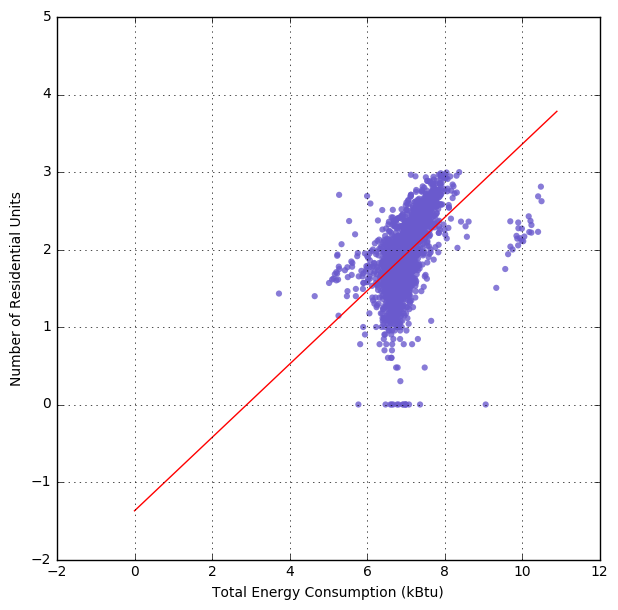

In [29]:
pl.figure(figsize = (7,7))
pl.scatter(x1, np.log10(y1), edgecolor='None', alpha = 0.8, c = 'slateblue')
#pl.xlim(0, 12)
#pl.ylim(-50,2500)
pl.plot(x_1, linmodel_1.predict(sm.add_constant(x_1)),'r', label = 'Regression Line')
pl.xlabel('Total Energy Consumption (kBtu)')
pl.ylabel('Number of Residential Units')
pl.grid(True)

### 2

Number of Residential Units: Independent Variable

Total Energy Consumption: Dependent Variable

In [30]:
x2 = np.log10(bblnrgdata_cut['UnitsRes'])
X2 = sm.add_constant(x2)
y2 = bblnrgdata_cut['Energy']
linmodel_2 = sm.OLS(np.log10(y2), X2, missing='drop').fit()

In [31]:
linmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     1522.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          1.66e-276
Time:                        18:51:06   Log-Likelihood:                -1631.6
No. Observations:                3488   AIC:                             3267.
Df Residuals:                    3486   BIC:                             3280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.7480      0.033    176.729      0.000         5.684     5.812
UnitsRes       0.6425      0.016     39.007      0.000         0.610     0.675
==============================================================================
Omnibus:                     2220.352   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91293.773
Skew:                           2.435   Prob(JB):                         0.00
Kurtosis:                      27.586   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 8: Scatter Plot of Units vs Energy with fitted linear line

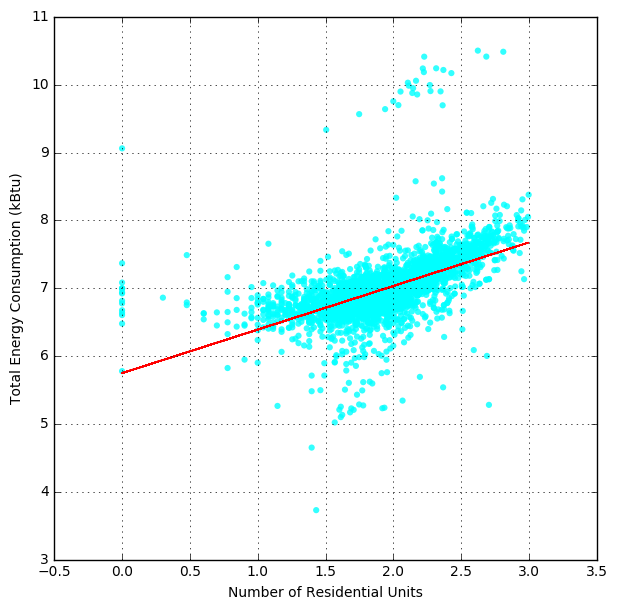

In [32]:
pl.figure(figsize = (7,7))
pl.scatter(x2, np.log10(y2), edgecolor='None', alpha = 0.8, c = 'aqua')
#pl.xlim(0, 3.5)
#pl.ylim(-0.25*1e10,3.5*1e10)
pl.plot(x2, linmodel_2.predict(X2),'r', label = 'Regression Line')
pl.ylabel('Total Energy Consumption (kBtu)')
pl.xlabel('Number of Residential Units')
pl.grid(True)

### 3. Evaluate which is better by calculating the chi square. 

In [33]:
#For Energy vs Units
chisq_1 = ((linmodel_1.predict(sm.add_constant(x1)) - np.log10(y1))**2\
          /y1).sum()
chisq_1

70.325463049978211

In [34]:
chisq_2 = ((linmodel_2.predict(sm.add_constant(x2)) - np.log10(y2))**2\
          /y2).sum()
chisq_2

0.0020904568871216462

### Model Units vs Energy has a smaller chi square (0.002 < 70); hence, this model may be a better fit compared with model Energy vs Units

I use the real values for calculating errors since the main purpose is comparing the models, so I can apply the same scale for both chi squares. If I use the log value, chisq_1 will be infinite due some close to xero values of np.log10(y1) and some large values of the residuals squared.

### 4. Fit a 2nd degree polynomial

In [35]:
polydata = pd.DataFrame()

In [36]:
polydata['Energy'] = np.log10(bblnrgdata_cut['Energy'])
polydata['UnitsRes'] = np.log10(bblnrgdata_cut['UnitsRes'])
polydata['UnitsRes2'] = np.log10(bblnrgdata_cut['UnitsRes'])**2

In [37]:
poly_model = smf.ols(formula = 'Energy ~ UnitsRes2**2 + UnitsRes',data=polydata).fit()

In [38]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     1040.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        18:51:06   Log-Likelihood:                -1447.3
No. Observations:                3488   AIC:                             2901.
Df Residuals:                    3485   BIC:                             2919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0008      0.071     99.090      0.000         6.862     7.139
UnitsRes2      0.3900      0.020     19.711      0.000         0.351     0.429
UnitsRes      -0.7914      0.074    -10.636      0.000        -0.937    -0.645
==============================================================================
Omnibus:                     2280.886   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119343.160
Skew:                           2.457   Prob(JB):                         0.00
Kurtosis:                      31.231   Cond. No.                         78.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
xyd = pd.DataFrame()
xyd['UnitsRes'] =  np.arange(polydata['UnitsRes'].min(),  polydata['UnitsRes'].max(), .1)
xyd['UnitsRes2'] = xyd['UnitsRes']**2

### Figure 9: Scatter Plot of Units vs Energy with 2nd degree fitted polynomial line

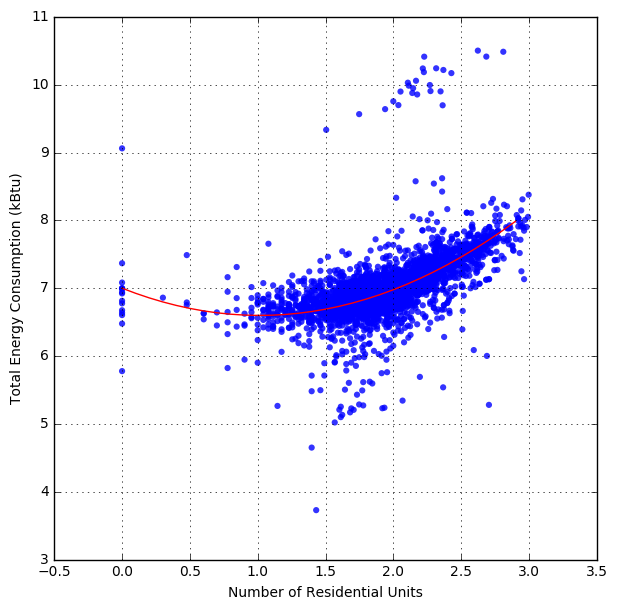

In [40]:
pl.figure(figsize = (7,7))
pl.scatter(x2, np.log10(y2), edgecolor='None', alpha = 0.8, c = 'b')  
#pl.xlim(0, 3.5)
#pl.ylim(-0.25*1e10,3.5*1e10)
#pl.ylim(0.0,0.0002,.000001)
pl.plot(xyd['UnitsRes'], poly_model.predict(xyd),'r', label = 'Regression Line')
pl.ylabel('Total Energy Consumption (kBtu)')
pl.xlabel('Number of Residential Units')
pl.grid(True)

### 5. Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test.

LR = -2 * (logLikelihood_Model1 - logLikelihood_Model2)

In [41]:
LR = -2 * (-1631.6 - (-1447.3))

In [42]:
LR

368.5999999999999

Degree of freedom: 1

At degree of freedom of 1 and significance level of 5%, the threshold value for the LR is 3.84. The LR value is ~ 368.6, which is larger than the threshold value, so model 1, the linear regression model is preferable to the 2nd degree polonimial model.

### Extra Credit

Lsurfac = np.zeros((len(A), len(B))) for i,a in enumerate(A): for j,b in enumerate(B): Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....


In [43]:
A = np.arange(-50.0, 50.0, 0.5)
B = np.arange (-100, 100, 1) 

In [44]:
def residuals(a,b,x,y,errors):
    return (np.log(y) - np.log(x)*a+b)**2 / errors**2

In [45]:
data = pd.DataFrame()
data['UnitsRes'] = bblnrgdata_cut['UnitsRes']
data['Energy'] = bblnrgdata_cut['Energy']

In [46]:
Lsurface = np.zeros((len(A), len(B))) 
for i, a in enumerate(A):
    for j, b in enumerate(B):
        Lsurface[i,j] = np.nansum(residuals(a,b,data['UnitsRes'],data['Energy'],\
                                       np.sqrt(data['Energy'])))

### Figure 10: The Log Likelihood Surface Graph

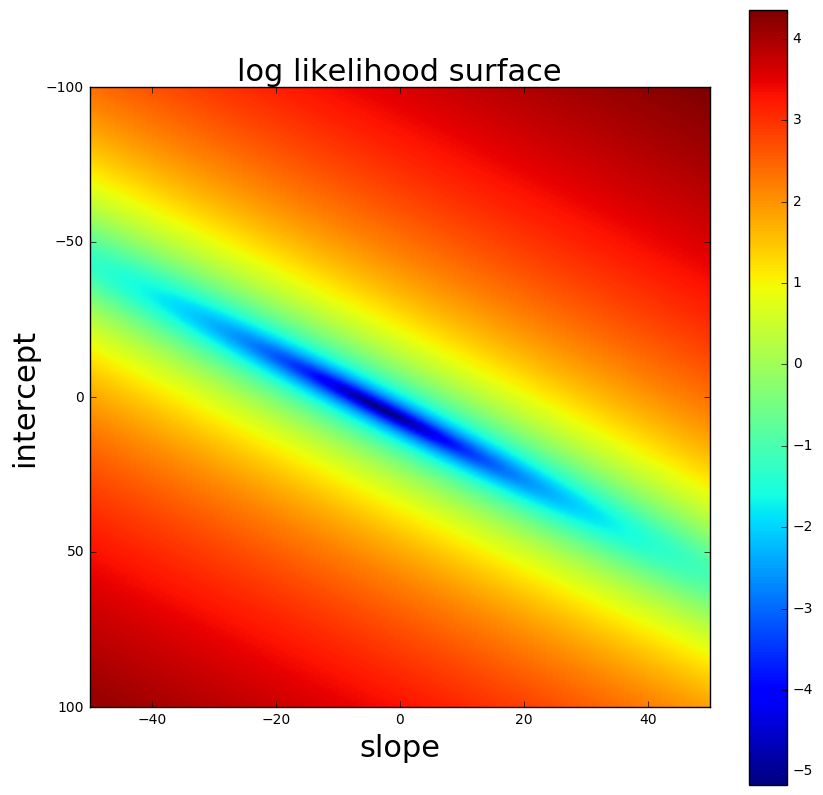

In [47]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

### Figure 11: Total Units vs Energy with Color maps Age in years and Size maps measures tital/residential units

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


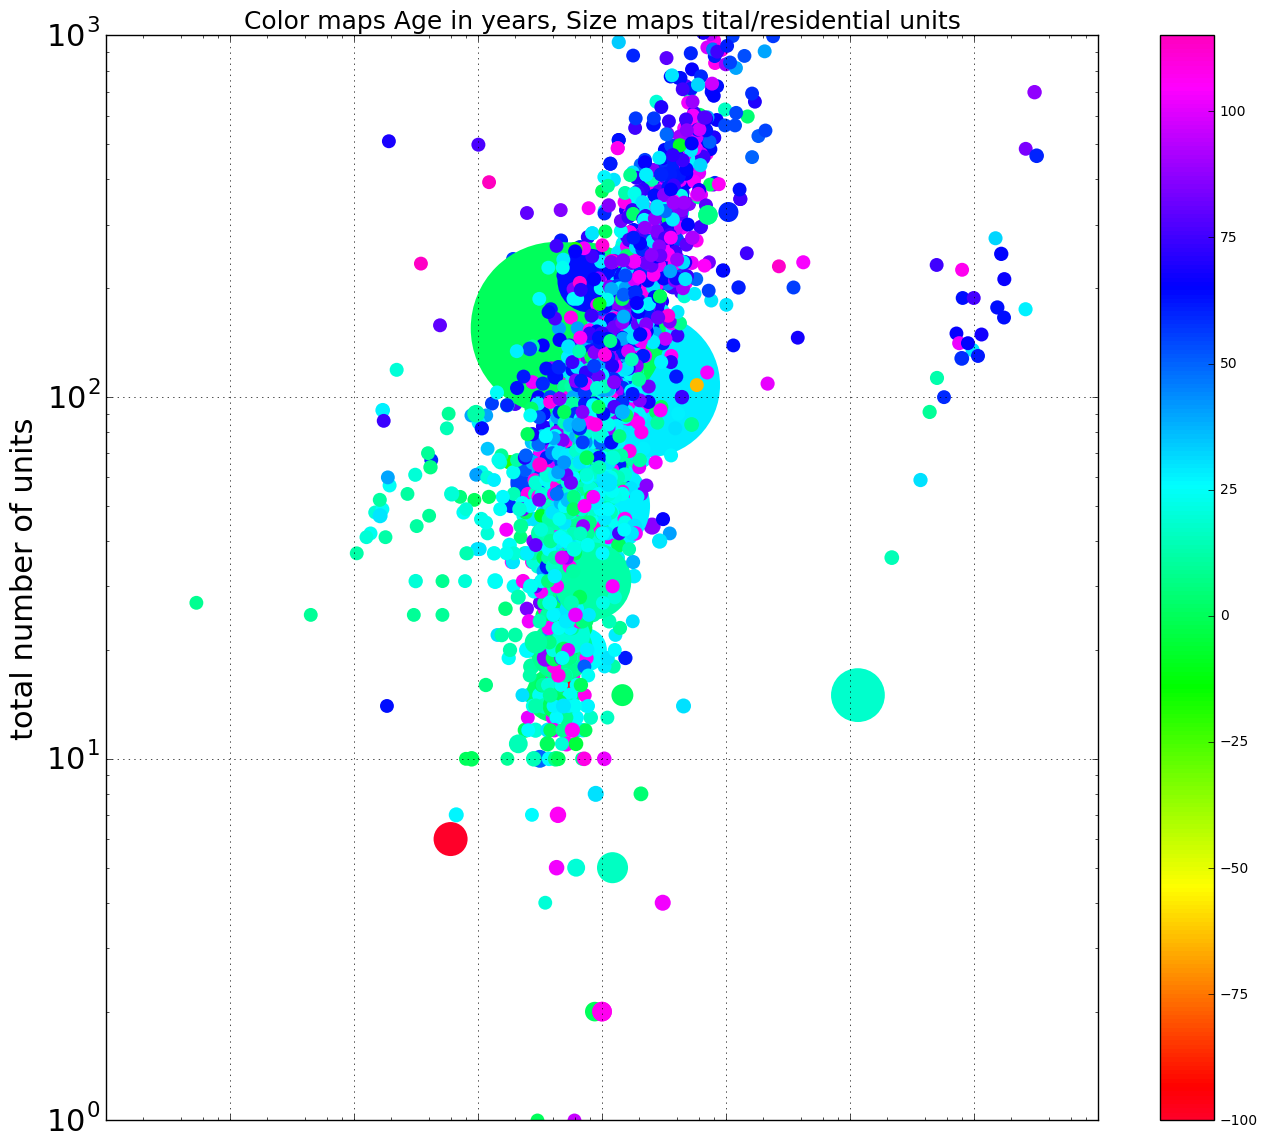

In [48]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

ax = bblnrgdata.plot(kind='scatter',x='Energy',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o', edgecolor='None',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)
ax.grid(True)

In [49]:
bblnrgdata['Total GHG Emissions(MtCO2e)'] = pd.to_numeric(bblnrgdata['Total GHG Emissions(MtCO2e)']\
                                                          , errors = 'coerce')

### Figure 12: Total Units vs Energy with Color maps Age in Total GHG Emissions and Size maps measures tital/residential units

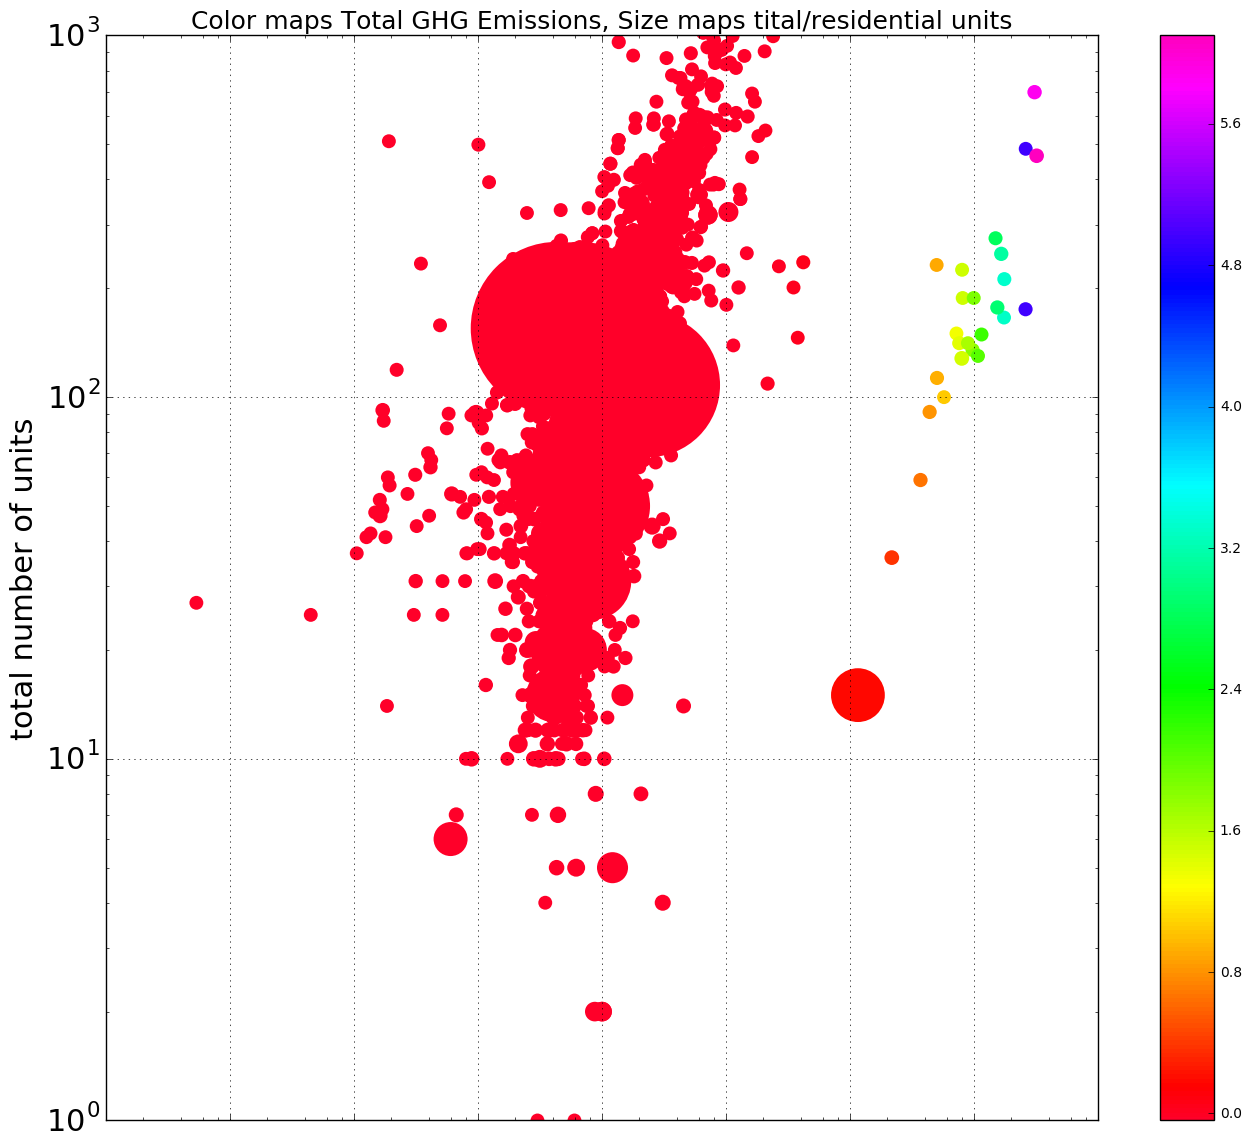

In [50]:
ax = bblnrgdata.plot(kind='scatter',x='Energy',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o', edgecolor='None',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=((bblnrgdata['Total GHG Emissions(MtCO2e)']\
                       -bblnrgdata['Total GHG Emissions(MtCO2e)'].mean())\
                       /bblnrgdata['Total GHG Emissions(MtCO2e)'].std()), 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Total GHG Emissions, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)
ax.grid(True)